<a href="https://colab.research.google.com/github/gus-s-ramos/AlgoritmoAtividadeFinal/blob/main/pratica/Atv04_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercícios — Associação entre Seleção e Crossover

1. **Seleção por Torneio + Crossover de 2 Pontos (Problema da Mochila Binária)**  
   Implemente um AG para o **problema da mochila 0/1**, onde cada item é representado por um gene binário.  
   - Use **seleção por torneio** para escolher os pais.  
   - Aplique **crossover de 2 pontos**.  
   - Analise como o tamanho do torneio (2, 3 e 5) afeta a convergência e a diversidade da população.  
   - Dica: avalie a **quantidade de indivíduos repetidos** após 30 gerações.

---

2. **Seleção por Roleta + Crossover Aritmético (Ajuste de Parâmetros Contínuos)**  
   Considere o problema de otimizar os parâmetros `[a, b]` de uma função real:  
   \( f(a,b) = - (a - 2)^2 - (b - 3)^2 + 10 \)  
   - Codifique os cromossomos como vetores reais.  
   - Use **seleção por roleta** e **crossover aritmético** com α variável.  
   - Compare os resultados para diferentes valores médios de α (0.3, 0.5, 0.8).  
   - Analise qual valor de α resultou em melhor equilíbrio entre exploração e estabilidade.

---

3. **Seleção por Ranking + Crossover Uniforme (Otimização de Layouts)**  
   Imagine um problema de **arranjo de componentes** (layout) em que a ordem dos elementos influencia o desempenho (ex.: disposição de tarefas em uma linha de produção).  
   - Represente as soluções como **permutação de inteiros**.  
   - Use **seleção por ranking** e **crossover uniforme modificado** (onde cada gene tem 50% de chance de vir de cada pai, respeitando a unicidade dos elementos).  
   - Meça o impacto do crossover uniforme sobre a **preservação de sequências úteis**.

---

4. **Seleção por Idade (Age-Based) + Crossover de 1 Ponto (Controle de Robôs)**  
   Em um experimento de **controle de robôs autônomos**, cada cromossomo codifica uma sequência de **ações discretas** (inteiros representando comandos).  
   - Use o método de **seleção baseada em idade**, onde indivíduos mais jovens têm maior probabilidade de reprodução.  
   - Combine os pais com **crossover de 1 ponto**.  
   - Analise se a estratégia ajuda a **evitar convergência prematura** em comparação com o método por torneio.

---

5. **Seleção Elitista + Crossover Híbrido (Otimização de Portfólio Financeiro)**  
   Considere um portfólio de 5 ativos representado por pesos reais que somam 1.  
   - Use **seleção elitista** para preservar os 10% melhores indivíduos.  
   - Aplique um **crossover híbrido**:  
     - 70% das vezes: crossover aritmético  
     - 30% das vezes: crossover uniforme (aplicado aos índices dos ativos mais relevantes)  
   - Compare a estabilidade dos resultados com e sem elitismo.  
   - Discuta a importância do equilíbrio entre **exploração** e **preservação das melhores soluções** neste contexto real.

Exercício 1

In [2]:
import random

# --- Dados do problema ---
itens = [
    {"peso": 2, "valor": 6},
    {"peso": 5, "valor": 9},
    {"peso": 3, "valor": 5},
    {"peso": 1, "valor": 2},
    {"peso": 4, "valor": 7}
]
capacidade = 10

# --- Função de fitness ---
def fitness(individuo):
    peso_total = 0
    valor_total = 0
    for gene, item in zip(individuo, itens):
        if gene == 1:
            peso_total += item["peso"]
            valor_total += item["valor"]
    # Penaliza se ultrapassar a capacidade
    if peso_total > capacidade:
        return 0
    return valor_total

# --- Geração de indivíduo binário ---
def gerar_individuo(n_genes):
    return [random.randint(0, 1) for _ in range(n_genes)]

# --- Implementação da Seleção por Torneio ---
def selecao_torneio(populacao, fitness_func, tamanho_torneio):
    """Seleciona um indivíduo usando seleção por torneio."""
    competidores = random.sample(populacao, tamanho_torneio)
    return max(competidores, key=fitness_func)

# --- Implementação do Crossover de 2 Pontos ---
def crossover_dois_pontos(pai1, pai2):
    """Aplica crossover de 2 pontos entre dois pais."""
    n_genes = len(pai1)
    if n_genes < 2:
        return pai1[:], pai2[:] # Crossover não faz sentido para menos de 2 genes

    ponto1 = random.randint(1, n_genes - 1)
    ponto2 = random.randint(1, n_genes - 1)

    # Garante que ponto1 é menor que ponto2
    if ponto1 > ponto2:
        ponto1, ponto2 = ponto2, ponto1
    if ponto1 == ponto2:
        if ponto1 == n_genes - 1:
            ponto1 -= 1
        else:
            ponto2 += 1

    filho1 = pai1[:ponto1] + pai2[ponto1:ponto2] + pai1[ponto2:]
    filho2 = pai2[:ponto1] + pai1[ponto1:ponto2] + pai2[ponto2:]
    return filho1, filho2

# --- Mutação (inverte bits com pequena probabilidade) ---
def mutacao(individuo, taxa=0.1):
    """Aplica mutação a um indivíduo."""
    for i in range(len(individuo)):
        if random.random() < taxa:
            individuo[i] = 1 - individuo[i]

# --- Parâmetros do AG ---
tam_pop = 50 # Aumentado para melhor diversidade e convergência
geracoes_analise = 30 # Conforme solicitado para análise de diversidade
taxas_mutacao = 0.1

tamanhos_torneio = [2, 3, 5]
resultados = {}

n_genes = len(itens)

for tam_torneio in tamanhos_torneio:
    print(f"\nExecutando para Tamanho do Torneio: {tam_torneio}")
    pop = [gerar_individuo(n_genes) for _ in range(tam_pop)]
    melhor_fitness_historico = []

    for g in range(geracoes_analise):
        fits = [fitness(ind) for ind in pop]
        # Elitismo: Mantém o melhor indivíduo da geração anterior
        melhor_da_geracao_anterior = pop[fits.index(max(fits))]

        nova_pop = [melhor_da_geracao_anterior] # O elitismo garante que o melhor passe para a próxima geração

        # Seleção por torneio e reprodução
        while len(nova_pop) < tam_pop:
            pai1 = selecao_torneio(pop, fitness, tam_torneio)
            pai2 = selecao_torneio(pop, fitness, tam_torneio)


            while pai1 == pai2 and tam_pop > 1: # Evita loop infinito se pop for 1
                 pai2 = selecao_torneio(pop, fitness, tam_torneio)

            filho1, filho2 = crossover_dois_pontos(list(pai1), list(pai2)) # Passa cópias para não modificar os pais
            mutacao(filho1, taxas_mutacao)
            mutacao(filho2, taxas_mutacao)
            nova_pop.extend([filho1, filho2])

        pop = nova_pop[:tam_pop] # Garante que a população não exceda tam_pop (pode acontecer com o extend)
        melhor_fitness_historico.append(max(fitness(ind) for ind in pop))

    # Análise após 30 gerações
    melhor_individuo_final = max(pop, key=fitness)
    melhor_valor_final = fitness(melhor_individuo_final)

    # Calcular diversidade
    individuos_unicos = set(tuple(ind) for ind in pop)
    quantidade_individuos_repetidos = tam_pop - len(individuos_unicos)

    resultados[tam_torneio] = {
        "melhor_individuo": melhor_individuo_final,
        "valor_total": melhor_valor_final,
        "quantidade_individuos_repetidos": quantidade_individuos_repetidos,
        "diversidade_percentual": (len(individuos_unicos) / tam_pop) * 100,
        "melhor_fitness_ao_longo_do_tempo": melhor_fitness_historico
    }

# --- Exibição dos Resultados ---
print("\n--- Resultados Finais ---")
for tam_torneio, dados in resultados.items():
    print(f"\nTamanho do Torneio: {tam_torneio}")
    print(f"  Melhor Indivíduo Encontrado: {dados['melhor_individuo']}")
    print(f"  Valor Total (Fitness): {dados['valor_total']}")
    print(f"  Quantidade de Indivíduos Repetidos (após {geracoes_analise} gerações): {dados['quantidade_individuos_repetidos']} de {tam_pop} indivíduos")
    print(f"  Diversidade da População: {dados['diversidade_percentual']:.2f}% de indivíduos únicos")



Executando para Tamanho do Torneio: 2

Executando para Tamanho do Torneio: 3

Executando para Tamanho do Torneio: 5

--- Resultados Finais ---

Tamanho do Torneio: 2
  Melhor Indivíduo Encontrado: [1, 1, 1, 0, 0]
  Valor Total (Fitness): 20
  Quantidade de Indivíduos Repetidos (após 30 gerações): 26 de 50 indivíduos
  Diversidade da População: 48.00% de indivíduos únicos

Tamanho do Torneio: 3
  Melhor Indivíduo Encontrado: [1, 0, 1, 1, 1]
  Valor Total (Fitness): 20
  Quantidade de Indivíduos Repetidos (após 30 gerações): 37 de 50 indivíduos
  Diversidade da População: 26.00% de indivíduos únicos

Tamanho do Torneio: 5
  Melhor Indivíduo Encontrado: [1, 0, 1, 1, 1]
  Valor Total (Fitness): 20
  Quantidade de Indivíduos Repetidos (após 30 gerações): 39 de 50 indivíduos
  Diversidade da População: 22.00% de indivíduos únicos


## Exercício 2

In [4]:
import random
import numpy as np

def fitness_real(individuo):
    a, b = individuo
    return - (a - 2)**2 - (b - 3)**2 + 10

def gerar_individuo_real(min_val=-5, max_val=5):
    return [random.uniform(min_val, max_val), random.uniform(min_val, max_val)]

def selecao_roleta(populacao, fitness_func):
    fits = [fitness_func(ind) for ind in populacao]


    min_fit = min(fits)
    if min_fit < 0:
        fits_normalizados = [f - min_fit for f in fits]
    else:
        fits_normalizados = fits

    soma_fits = sum(fits_normalizados)

    if soma_fits == 0:
        return random.choice(populacao)

    pick = random.uniform(0, soma_fits)
    current = 0
    for i, ind in enumerate(populacao):
        current += fits_normalizados[i]
        if current > pick:
            return ind
    return populacao[-1]

def crossover_aritmetico(pai1, pai2, alpha):
    """Aplica crossover aritmético entre dois pais."""
    if isinstance(alpha, (int, float)):
        current_alpha = alpha
    else:
        current_alpha = alpha()

    filho1 = [current_alpha * pai1[i] + (1 - current_alpha) * pai2[i] for i in range(len(pai1))]
    filho2 = [(1 - current_alpha) * pai1[i] + current_alpha * pai2[i] for i in range(len(pai1))]
    return filho1, filho2


def mutacao_real(individuo, taxa=0.1, desvio_padrao=0.1):
    """Aplica mutação a um indivíduo real adicionando ruído Gaussiano."""
    for i in range(len(individuo)):
        if random.random() < taxa:
            individuo[i] += random.gauss(0, desvio_padrao)



tam_pop = 100
geracoes = 100
taxa_mutacao = 0.1
desvio_padrao_mutacao = 0.5


valores_medios_alpha = [0.3, 0.5, 0.8]
resultados_ex2 = {}

for alpha_val in valores_medios_alpha:
    print(f"\nExecutando para Crossover Aritmético com \u03B1 = {alpha_val}")
    pop = [gerar_individuo_real() for _ in range(tam_pop)]
    melhor_fitness_historico_ex2 = []
    melhor_individuo_historico_ex2 = []

    for g in range(geracoes):
        fits = [fitness_real(ind) for ind in pop]

        melhor_da_geracao_anterior = list(pop[fits.index(max(fits))])

        nova_pop = [melhor_da_geracao_anterior]

        while len(nova_pop) < tam_pop:
            pai1 = selecao_roleta(pop, fitness_real)
            pai2 = selecao_roleta(pop, fitness_real)

            filho1, filho2 = crossover_aritmetico(pai1, pai2, alpha_val)

            mutacao_real(filho1, taxa_mutacao, desvio_padrao_mutacao)
            mutacao_real(filho2, taxa_mutacao, desvio_padrao_mutacao)
            nova_pop.extend([filho1, filho2])

        pop = nova_pop[:tam_pop]

        current_best_fit = max(fitness_real(ind) for ind in pop)
        current_best_ind = max(pop, key=fitness_real)
        melhor_fitness_historico_ex2.append(current_best_fit)
        melhor_individuo_historico_ex2.append(current_best_ind)

    melhor_individuo_final_ex2 = max(pop, key=fitness_real)
    melhor_valor_final_ex2 = fitness_real(melhor_individuo_final_ex2)

    genes_a = [ind[0] for ind in pop]
    genes_b = [ind[1] for ind in pop]
    variancia_a = np.var(genes_a)
    variancia_b = np.var(genes_b)


    resultados_ex2[alpha_val] = {
        "melhor_individuo": melhor_individuo_final_ex2,
        "melhor_fitness": melhor_valor_final_ex2,
        "historico_fitness": melhor_fitness_historico_ex2,
        "variancia_genes_a": variancia_a,
        "variancia_genes_b": variancia_b
    }


print("\n--- Resultados Finais (Exercício 2) ---")
for alpha_val, dados in resultados_ex2.items():
    print(f"\nCrossover com \u03B1 = {alpha_val}")
    print(f"  Melhor Indivíduo Encontrado (a, b): [{dados['melhor_individuo'][0]:.4f}, {dados['melhor_individuo'][1]:.4f}]")
    print(f"  Melhor Fitness (f(a,b)): {dados['melhor_fitness']:.4f}")
    print(f"  Variância dos genes 'a' na pop final: {dados['variancia_genes_a']:.4f}")
    print(f"  Variância dos genes 'b' na pop final: {dados['variancia_genes_b']:.4f}")




Executando para Crossover Aritmético com α = 0.3

Executando para Crossover Aritmético com α = 0.5

Executando para Crossover Aritmético com α = 0.8

--- Resultados Finais (Exercício 2) ---

Crossover com α = 0.3
  Melhor Indivíduo Encontrado (a, b): [1.9931, 3.0108]
  Melhor Fitness (f(a,b)): 9.9998
  Variância dos genes 'a' na pop final: 0.0689
  Variância dos genes 'b' na pop final: 0.0421

Crossover com α = 0.5
  Melhor Indivíduo Encontrado (a, b): [1.9885, 3.0092]
  Melhor Fitness (f(a,b)): 9.9998
  Variância dos genes 'a' na pop final: 0.0485
  Variância dos genes 'b' na pop final: 0.0603

Crossover com α = 0.8
  Melhor Indivíduo Encontrado (a, b): [2.0017, 3.0002]
  Melhor Fitness (f(a,b)): 10.0000
  Variância dos genes 'a' na pop final: 0.1080
  Variância dos genes 'b' na pop final: 0.0409


Exercício 03

In [5]:
import random

componentes = list(range(5))

sequencias_uteis = {
    (0, 1): 5,
    (2, 3, 4): 10,
    (4, 0): 7,
    (1, 3): 3
}

def fitness_layout(permutacao):
    fitness_score = 0


    perm_tuple = tuple(permutacao)


    for seq, bonus in sequencias_uteis.items():

        seq_tuple = tuple(seq)

        for i in range(len(perm_tuple) - len(seq_tuple) + 1):
            if perm_tuple[i : i + len(seq_tuple)] == seq_tuple:
                fitness_score += bonus

    return fitness_score

print("Testando a função fitness_layout:")
permutacao1 = [0, 1, 2, 3, 4]
print(f"Permutação {permutacao1}: Fitness = {fitness_layout(permutacao1)}")

permutacao2 = [4, 0, 1, 2, 3]
print(f"Permutação {permutacao2}: Fitness = {fitness_layout(permutacao2)}")

permutacao3 = [2, 1, 0, 4, 3]
print(f"Permutação {permutacao3}: Fitness = {fitness_layout(permutacao3)}")

permutacao4 = [1, 3, 0, 2, 4]
print(f"Permutação {permutacao4}: Fitness = {fitness_layout(permutacao4)}")

Testando a função fitness_layout:
Permutação [0, 1, 2, 3, 4]: Fitness = 15
Permutação [4, 0, 1, 2, 3]: Fitness = 12
Permutação [2, 1, 0, 4, 3]: Fitness = 0
Permutação [1, 3, 0, 2, 4]: Fitness = 3


Seleção por Ranking

In [6]:
import random

def selecao_ranking(populacao, fitness_func):
    """Seleciona um indivíduo da população usando seleção por ranking."""

    individuos_com_fitness = [(ind, fitness_func(ind)) for ind in populacao]

    individuos_ordenados_por_fitness = sorted(individuos_com_fitness, key=lambda x: x[1])

    N = len(populacao)
    scores_para_roleta = []
    for i, (individuo, _) in enumerate(individuos_ordenados_por_fitness):
        scores_para_roleta.append((individuo, i + 1))

    total_score = sum(score for _, score in scores_para_roleta)

    if total_score == 0:
        return random.choice(populacao)

    probabilidades = [score / total_score for _, score in scores_para_roleta]

    pick = random.uniform(0, 1)
    current_prob_sum = 0
    for i, (individuo, _) in enumerate(scores_para_roleta):
        current_prob_sum += probabilidades[i]
        if pick <= current_prob_sum:
            return individuo

    return individuos_ordenados_por_fitness[-1][0]


def gerar_individuo_permutacao(n_elementos):
    return random.sample(range(n_elementos), n_elementos)

pop_teste = [gerar_individuo_permutacao(5) for _ in range(10)]

print("\nTestando selecao_ranking com uma população de exemplo:")
print(f"População de teste: {pop_teste}")

fitnesses_teste = [(ind, fitness_layout(ind)) for ind in pop_teste]
print(f"Fitnesses dos indivíduos: {fitnesses_teste}")

selecionado = selecao_ranking(pop_teste, fitness_layout)
print(f"Indivíduo selecionado por ranking: {selecionado} (Fitness: {fitness_layout(selecionado)})")



Testando selecao_ranking com uma população de exemplo:
População de teste: [[0, 1, 4, 3, 2], [4, 1, 3, 0, 2], [3, 0, 1, 2, 4], [4, 3, 0, 1, 2], [4, 0, 1, 3, 2], [4, 3, 1, 2, 0], [0, 4, 2, 3, 1], [2, 1, 3, 4, 0], [3, 4, 0, 1, 2], [2, 0, 3, 1, 4]]
Fitnesses dos indivíduos: [([0, 1, 4, 3, 2], 5), ([4, 1, 3, 0, 2], 3), ([3, 0, 1, 2, 4], 5), ([4, 3, 0, 1, 2], 5), ([4, 0, 1, 3, 2], 15), ([4, 3, 1, 2, 0], 0), ([0, 4, 2, 3, 1], 0), ([2, 1, 3, 4, 0], 10), ([3, 4, 0, 1, 2], 12), ([2, 0, 3, 1, 4], 0)]
Indivíduo selecionado por ranking: [4, 3, 0, 1, 2] (Fitness: 5)


**Reasoning**:
The next step is to implement the modified uniform crossover for permutations, which needs to ensure uniqueness of elements while blending genes from two parents. I will implement a variant of uniform crossover suitable for permutations.



In [7]:
import random

def crossover_uniforme_modificado(pai1, pai2):
    """Aplica um crossover uniforme modificado para permutações, garantindo unicidade.
    Cada gene tem 50% de chance de vir de cada pai.
    """
    n_genes = len(pai1)
    filho1 = [None] * n_genes
    filho2 = [None] * n_genes

    # 1. Gerar uma máscara binária (50% de chance para cada pai)
    mask = [random.choice([0, 1]) for _ in range(n_genes)]

    # 2. Preencher filho1
    # Copia os genes do pai1 para filho1 onde a máscara é 0
    for i in range(n_genes):
        if mask[i] == 0:
            filho1[i] = pai1[i]

    # Pega os elementos restantes do pai2 que ainda não estão em filho1, mantendo a ordem
    elementos_restantes_pai2 = [gene for gene in pai2 if gene not in filho1]
    idx_restantes = 0
    for i in range(n_genes):
        if filho1[i] is None:
            filho1[i] = elementos_restantes_pai2[idx_restantes]
            idx_restantes += 1

    # 3. Preencher filho2 (invertendo a lógica da máscara)
    # Copia os genes do pai2 para filho2 onde a máscara é 0 (ou seja, 1 para filho1)
    for i in range(n_genes):
        if mask[i] == 1: # Usando a máscara invertida para o filho2
            filho2[i] = pai2[i]

    # Pega os elementos restantes do pai1 que ainda não estão em filho2, mantendo a ordem
    elementos_restantes_pai1 = [gene for gene in pai1 if gene not in filho2]
    idx_restantes = 0
    for i in range(n_genes):
        if filho2[i] is None:
            filho2[i] = elementos_restantes_pai1[idx_restantes]
            idx_restantes += 1

    return filho1, filho2

# Testando a função de crossover uniforme modificado
pai_a = [0, 1, 2, 3, 4]
pai_b = [4, 3, 2, 1, 0]

print("\nTestando crossover_uniforme_modificado:")
print(f"Pai A: {pai_a}")
print(f"Pai B: {pai_b}")

filho_x, filho_y = crossover_uniforme_modificado(pai_a, pai_b)
print(f"Filho X: {filho_x} (unicidade: {len(set(filho_x)) == len(filho_x)})")
print(f"Filho Y: {filho_y} (unicidade: {len(set(filho_y)) == len(filho_y)})")

filho_x, filho_y = crossover_uniforme_modificado(pai_a, pai_b)
print(f"Filho X: {filho_x} (unicidade: {len(set(filho_x)) == len(filho_x)})")
print(f"Filho Y: {filho_y} (unicidade: {len(set(filho_y)) == len(filho_y)})")

# Teste com permutações geradas aleatoriamente
pai_a_rand = gerar_individuo_permutacao(5)
pai_b_rand = gerar_individuo_permutacao(5)
print(f"\nTeste com pais aleatórios:")
print(f"Pai A (rand): {pai_a_rand}")
print(f"Pai B (rand): {pai_b_rand}")
filho_x_rand, filho_y_rand = crossover_uniforme_modificado(pai_a_rand, pai_b_rand)
print(f"Filho X (rand): {filho_x_rand} (unicidade: {len(set(filho_x_rand)) == len(filho_x_rand)})")
print(f"Filho Y (rand): {filho_y_rand} (unicidade: {len(set(filho_y_rand)) == len(filho_y_rand)})")


Testando crossover_uniforme_modificado:
Pai A: [0, 1, 2, 3, 4]
Pai B: [4, 3, 2, 1, 0]
Filho X: [4, 1, 2, 3, 0] (unicidade: True)
Filho Y: [4, 3, 1, 2, 0] (unicidade: True)
Filho X: [0, 4, 2, 3, 1] (unicidade: True)
Filho Y: [1, 3, 2, 4, 0] (unicidade: True)

Teste com pais aleatórios:
Pai A (rand): [2, 3, 0, 4, 1]
Pai B (rand): [1, 0, 2, 3, 4]
Filho X (rand): [1, 3, 0, 2, 4] (unicidade: True)
Filho Y (rand): [1, 0, 2, 3, 4] (unicidade: True)


**Reasoning**:
The next step, as per the problem description, is to implement the mutation operation for permutations, specifically 'swap mutation'. This will complete the set of genetic operators required for the GA.



In [8]:
import random

def mutacao_troca(individuo, taxa=0.1):
    """Aplica mutação por troca (swap mutation) a um indivíduo.
    Com uma dada taxa, dois genes aleatórios no cromossomo são trocados de posição.
    """
    for i in range(len(individuo)):
        if random.random() < taxa:
            # Escolhe dois índices aleatórios diferentes para trocar
            idx1, idx2 = random.sample(range(len(individuo)), 2)
            individuo[idx1], individuo[idx2] = individuo[idx2], individuo[idx1]

# Testando a função de mutação por troca
individuo_original = [0, 1, 2, 3, 4]
individuo_mutado = list(individuo_original) # Cria uma cópia para mutação

print("\nTestando mutacao_troca:")
print(f"Indivíduo original: {individuo_original}")

# Aplica mutação com uma alta taxa para garantir que ocorra no teste
mutacao_troca(individuo_mutado, taxa=0.8)
print(f"Indivíduo mutado (taxa 0.8): {individuo_mutado}")
print(f"Permutação válida após mutação: {len(set(individuo_mutado)) == len(individuo_mutado)}")

individuo_mutado_2 = list(individuo_original)
mutacao_troca(individuo_mutado_2, taxa=0.1)
print(f"Indivíduo mutado (taxa 0.1): {individuo_mutado_2}")
print(f"Permutação válida após mutação: {len(set(individuo_mutado_2)) == len(individuo_mutado_2)}")



Testando mutacao_troca:
Indivíduo original: [0, 1, 2, 3, 4]
Indivíduo mutado (taxa 0.8): [4, 0, 1, 2, 3]
Permutação válida após mutação: True
Indivíduo mutado (taxa 0.1): [1, 0, 2, 3, 4]
Permutação válida após mutação: True


In [10]:
import random
import numpy as np

TAM_POP = 100
NUM_GERACOES = 200
TAXA_MUTACAO = 0.1
NUM_COMPONENTES = 5



def executar_ag_layout():
    populacao = [gerar_individuo_permutacao(NUM_COMPONENTES) for _ in range(TAM_POP)]
    melhor_individuo_global = None
    melhor_fitness_global = -1
    historico_melhor_fitness = []

    print("\n--- Executando o Algoritmo Genético para Otimização de Layout ---")

    for geracao in range(NUM_GERACOES):

        fitnesses = [fitness_layout(ind) for ind in populacao]


        idx_melhor_atual = np.argmax(fitnesses)
        melhor_individuo_atual = populacao[idx_melhor_atual]
        melhor_fitness_atual = fitnesses[idx_melhor_atual]


        if melhor_fitness_atual > melhor_fitness_global:
            melhor_fitness_global = melhor_fitness_atual
            melhor_individuo_global = list(melhor_individuo_atual) # Copia para evitar modificações futuras

        historico_melhor_fitness.append(melhor_fitness_global)


        nova_populacao = []
        if melhor_individuo_global is not None:
            nova_populacao.append(list(melhor_individuo_global))
        else:
            nova_populacao.append(list(melhor_individuo_atual))

        while len(nova_populacao) < TAM_POP:
            pai1 = selecao_ranking(populacao, fitness_layout)
            pai2 = selecao_ranking(populacao, fitness_layout)

            while pai1 == pai2 and TAM_POP > 1:
                pai2 = selecao_ranking(populacao, fitness_layout)

            filho1, filho2 = crossover_uniforme_modificado(list(pai1), list(pai2))

            mutacao_troca(filho1, TAXA_MUTACAO)
            mutacao_troca(filho2, TAXA_MUTACAO)

            nova_populacao.append(filho1)
            if len(nova_populacao) < TAM_POP:
                nova_populacao.append(filho2)

        populacao = nova_populacao

        if geracao % 20 == 0:
            print(f"Geração {geracao}: Melhor Fitness Atual = {melhor_fitness_atual}, Melhor Fitness Global = {melhor_fitness_global}")

    print("\n--- Otimização Concluída ---")
    print(f"Melhor Layout Encontrado: {melhor_individuo_global}")
    print(f"Fitness do Melhor Layout: {melhor_fitness_global}")

    sequencias_presentes = []
    for seq, _ in sequencias_uteis.items():
        seq_tuple = tuple(seq)
        for i in range(len(melhor_individuo_global) - len(seq_tuple) + 1):
            if tuple(melhor_individuo_global[i : i + len(seq_tuple)]) == seq_tuple:
                sequencias_presentes.append(seq)
                break


    return melhor_individuo_global, melhor_fitness_global, historico_melhor_fitness

melhor_layout, melhor_fitness, historico = executar_ag_layout()



--- Executando o Algoritmo Genético para Otimização de Layout ---
Geração 0: Melhor Fitness Atual = 22, Melhor Fitness Global = 22
Geração 20: Melhor Fitness Atual = 22, Melhor Fitness Global = 22
Geração 40: Melhor Fitness Atual = 22, Melhor Fitness Global = 22
Geração 60: Melhor Fitness Atual = 22, Melhor Fitness Global = 22
Geração 80: Melhor Fitness Atual = 22, Melhor Fitness Global = 22
Geração 100: Melhor Fitness Atual = 22, Melhor Fitness Global = 22
Geração 120: Melhor Fitness Atual = 22, Melhor Fitness Global = 22
Geração 140: Melhor Fitness Atual = 22, Melhor Fitness Global = 22
Geração 160: Melhor Fitness Atual = 22, Melhor Fitness Global = 22
Geração 180: Melhor Fitness Atual = 22, Melhor Fitness Global = 22

--- Otimização Concluída ---
Melhor Layout Encontrado: [2, 3, 4, 0, 1]
Fitness do Melhor Layout: 22


Exercício 4


In [11]:
import random
import math

# --- 1. Definir os parâmetros do problema de controle de robôs ---
acoes_validas = {
    0: (0, 0),   # Parar/Ficar no lugar
    1: (0, 1),   # Mover para cima (Y+)
    2: (0, -1),  # Mover para baixo (Y-)
    3: (1, 0),   # Mover para a direita (X+)
    4: (-1, 0)   # Mover para a esquerda (X-)
}

comprimento_cromossomo = 10  # Número de ações na sequência
ponto_alvo = (5, 5)          # Coordenada (X, Y) que o robô deve atingir
posicao_inicial = (0, 0)

# --- 2. e 3. Criar a função fitness_robo e simular o movimento ---
def fitness_robo(individuo):
    x, y = posicao_inicial

    for acao_codigo in individuo:
        if acao_codigo in acoes_validas:
            dx, dy = acoes_validas[acao_codigo]
            x += dx
            y += dy
        # else: Ação inválida, podemos adicionar uma penalidade aqui se desejado

    # --- 4. Calcular o fitness (distância euclidiana até o ponto alvo) ---
    distancia = math.sqrt((ponto_alvo[0] - x)**2 + (ponto_alvo[1] - y)**2)

    # Queremos minimizar a distância, então o fitness é inversamente proporcional à distância.
    # Para evitar divisão por zero ou fitness infinito, podemos usar uma constante.
    # Quanto menor a distância, maior o fitness.
    if distancia == 0:
        return 1000.0 # Valor alto para fitness perfeito
    else:
        return 1.0 / distancia

# Função auxiliar para gerar um indivíduo (sequência de ações)
def gerar_individuo_robo(comprimento):
    return [random.randint(0, len(acoes_validas) - 1) for _ in range(comprimento)]

# --- Testando a função de fitness ---
print("--- Testando a função fitness_robo ---")

# Exemplo 1: Indivíduo que se move diretamente para o alvo (5x direita, 5x cima)
individuo_perfeito = [3] * 5 + [1] * 5
print(f"Indivíduo Perfeito: {individuo_perfeito}")
print(f"Fitness (perfeito): {fitness_robo(individuo_perfeito):.4f}")

# Exemplo 2: Indivíduo aleatório
individuo_aleatorio = gerar_individuo_robo(comprimento_cromossomo)
print(f"Indivíduo Aleatório: {individuo_aleatorio}")
print(f"Fitness (aleatório): {fitness_robo(individuo_aleatorio):.4f}")

# Exemplo 3: Indivíduo que fica parado
individuo_parado = [0] * comprimento_cromossomo
print(f"Indivíduo Parado: {individuo_parado}")
print(f"Fitness (parado): {fitness_robo(individuo_parado):.4f}")


--- Testando a função fitness_robo ---
Indivíduo Perfeito: [3, 3, 3, 3, 3, 1, 1, 1, 1, 1]
Fitness (perfeito): 1000.0000
Indivíduo Aleatório: [1, 0, 3, 1, 0, 2, 1, 2, 4, 3]
Fitness (aleatório): 0.1768
Indivíduo Parado: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Fitness (parado): 0.1414


Seleção Baseada em Idade

In [12]:
import random

def selecao_por_idade(populacao_com_idade):
    """Seleciona um indivíduo da população usando seleção baseada em idade.
    Indivíduos mais jovens (menor 'idade') têm maior probabilidade de serem selecionados.

    Args:
        populacao_com_idade (list): Uma lista de tuplas (individuo, idade).

    Returns:
        list: O indivíduo selecionado.
    """
    # Calcula o 'score de seleção' baseado na inversa da idade (para que menor idade signifique maior score)
    # Adicionamos 1 à idade para evitar divisão por zero se a idade for 0.
    # Se todos tiverem idade 0, todos terão score 1 e probabilidade igual.
    scores = [1.0 / (idade + 1) for individuo, idade in populacao_com_idade]

    total_scores = sum(scores)

    if total_scores == 0:
        # Caso todos os scores sejam 0 (improvável com 1.0/(idade+1)), retorna um aleatório
        return random.choice(populacao_com_idade)[0]

    pick = random.uniform(0, total_scores)
    current_score_sum = 0

    for i, (individuo, _) in enumerate(populacao_com_idade):
        current_score_sum += scores[i]
        if current_score_sum >= pick:
            return individuo

    # Em caso de erro de arredondamento, retorna o último
    return populacao_com_idade[-1][0]

# --- Testando a função de seleção por idade ---
print("\n--- Testando a função selecao_por_idade ---")

# População de exemplo com indivíduos e suas idades
# (individual, idade)
populacao_exemplo_idade = [
    ([0, 0, 0, 0], 5),  # Mais velho, menor probabilidade
    ([1, 1, 1, 1], 0),  # Mais jovem, maior probabilidade
    ([2, 2, 2, 2], 2),  # Idade intermediária
    ([3, 3, 3, 3], 0),  # Mais jovem, maior probabilidade
    ([4, 4, 4, 4], 1)   # Idade intermediária
]

print("População de exemplo com idade:")
for ind, idade in populacao_exemplo_idade:
    print(f"  Indivíduo: {ind}, Idade: {idade}")

# Simula várias seleções para observar a tendência
selecoes_contagem = {}
num_testes = 1000

for _ in range(num_testes):
    selecionado = selecao_por_idade(populacao_exemplo_idade)
    selecoes_contagem[tuple(selecionado)] = selecoes_contagem.get(tuple(selecionado), 0) + 1

print(f"\nResultados da seleção em {num_testes} testes:")
for ind_tuple, count in selecoes_contagem.items():
    print(f"  Indivíduo {list(ind_tuple)} selecionado {count} vezes ({count/num_testes:.2%})")

# Verificação simples: Indivíduos com idade 0 devem ter sido selecionados mais vezes.
# Isso é uma verificação qualitativa.
idade_0_selecoes = 0
for ind_tuple, count in selecoes_contagem.items():
    # Encontra a idade original do indivíduo selecionado
    original_age = next((idade for i, idade in populacao_exemplo_idade if list(i) == list(ind_tuple)), -1)
    if original_age == 0:
        idade_0_selecoes += count

print(f"\nTotal de seleções para indivíduos com idade 0: {idade_0_selecoes} ({idade_0_selecoes/num_testes:.2%})")



--- Testando a função selecao_por_idade ---
População de exemplo com idade:
  Indivíduo: [0, 0, 0, 0], Idade: 5
  Indivíduo: [1, 1, 1, 1], Idade: 0
  Indivíduo: [2, 2, 2, 2], Idade: 2
  Indivíduo: [3, 3, 3, 3], Idade: 0
  Indivíduo: [4, 4, 4, 4], Idade: 1

Resultados da seleção em 1000 testes:
  Indivíduo [0, 0, 0, 0] selecionado 61 vezes (6.10%)
  Indivíduo [4, 4, 4, 4] selecionado 170 vezes (17.00%)
  Indivíduo [3, 3, 3, 3] selecionado 318 vezes (31.80%)
  Indivíduo [1, 1, 1, 1] selecionado 344 vezes (34.40%)
  Indivíduo [2, 2, 2, 2] selecionado 107 vezes (10.70%)

Total de seleções para indivíduos com idade 0: 662 (66.20%)


Crossover de 1 Ponto


In [13]:
import random

def crossover_um_ponto(pai1, pai2):
    """Aplica crossover de 1 ponto entre dois pais (sequências de inteiros)."""
    n_genes = len(pai1)
    if n_genes <= 1:
        return list(pai1), list(pai2) # Não faz sentido para 1 ou menos genes, retorna cópias

    # Escolhe um ponto de crossover aleatório
    # O ponto pode ser de 1 até n_genes-1, dividindo o cromossomo em duas partes
    ponto = random.randint(1, n_genes - 1)

    filho1 = pai1[:ponto] + pai2[ponto:]
    filho2 = pai2[:ponto] + pai1[ponto:]

    return filho1, filho2

# --- Testando a função de crossover de 1 ponto ---
print("\n--- Testando a função crossover_um_ponto ---")

pai_a = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
pai_b = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

print(f"Pai A: {pai_a}")
print(f"Pai B: {pai_b}")

# Teste 1
filho_x, filho_y = crossover_um_ponto(pai_a, pai_b)
print(f"Filho X (Teste 1): {filho_x}")
print(f"Filho Y (Teste 1): {filho_y}")

# Teste 2 (para mostrar um ponto de corte diferente)
filho_x_2, filho_y_2 = crossover_um_ponto(pai_a, pai_b)
print(f"Filho X (Teste 2): {filho_x_2}")
print(f"Filho Y (Teste 2): {filho_y_2}")

# Teste com cromossomo curto
pai_curto_1 = [1, 2]
pai_curto_2 = [3, 4]
filho_curto_x, filho_curto_y = crossover_um_ponto(pai_curto_1, pai_curto_2)
print(f"Pai Curto 1: {pai_curto_1}, Pai Curto 2: {pai_curto_2}")
print(f"Filho Curto X: {filho_curto_x}, Filho Curto Y: {filho_curto_y}")



--- Testando a função crossover_um_ponto ---
Pai A: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Pai B: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
Filho X (Teste 1): [1, 2, 3, 4, 5, 5, 4, 3, 2, 1]
Filho Y (Teste 1): [10, 9, 8, 7, 6, 6, 7, 8, 9, 10]
Filho X (Teste 2): [1, 2, 3, 4, 5, 6, 4, 3, 2, 1]
Filho Y (Teste 2): [10, 9, 8, 7, 6, 5, 7, 8, 9, 10]
Pai Curto 1: [1, 2], Pai Curto 2: [3, 4]
Filho Curto X: [1, 4], Filho Curto Y: [3, 2]


Implementação da Mutação para Sequências de Inteiros



In [14]:
import random

def mutacao_robo(individuo, taxa_mutacao=0.1):
    """Aplica mutação a um indivíduo (sequência de ações de robô).
    Cada gene tem uma chance 'taxa_mutacao' de ser substituído por uma ação válida aleatória.
    """
    num_acoes_validas = len(acoes_validas) # acoes_validas é uma variável global do problema

    for i in range(len(individuo)):
        if random.random() < taxa_mutacao:
            # Substitui o gene por uma nova ação válida aleatória
            individuo[i] = random.randint(0, num_acoes_validas - 1)

# --- Testando a função de mutação ---s
print("\n--- Testando a função mutacao_robo ---")

individuo_original = [3, 3, 3, 3, 3, 1, 1, 1, 1, 1] # Indivíduo "perfeito" do teste de fitness
individuo_mutado = list(individuo_original) # Cria uma cópia para mutação

print(f"Indivíduo original: {individuo_original}")

# Teste com uma taxa de mutação alta para ver o efeito
mutacao_robo(individuo_mutado, taxa_mutacao=0.5)
print(f"Indivíduo mutado (taxa 0.5): {individuo_mutado}")

individuo_mutado_2 = list(individuo_original)
mutacao_robo(individuo_mutado_2, taxa_mutacao=0.1)
print(f"Indivíduo mutado (taxa 0.1): {individuo_mutado_2}")

# Verifica se os genes mutados são válidos
for ind in [individuo_mutado, individuo_mutado_2]:
    for gene in ind:
        if gene not in acoes_validas:
            print(f"ERRO: Gene inválido encontrado: {gene} em {ind}")
            break
    else:
        print(f"Todos os genes em {ind} são ações válidas.")


--- Testando a função mutacao_robo ---
Indivíduo original: [3, 3, 3, 3, 3, 1, 1, 1, 1, 1]
Indivíduo mutado (taxa 0.5): [3, 3, 0, 3, 3, 1, 1, 1, 1, 2]
Indivíduo mutado (taxa 0.1): [3, 3, 3, 3, 3, 1, 1, 1, 1, 0]
Todos os genes em [3, 3, 0, 3, 3, 1, 1, 1, 1, 2] são ações válidas.
Todos os genes em [3, 3, 3, 3, 3, 1, 1, 1, 1, 0] são ações válidas.


In [15]:
import random
import math
import numpy as np

TAM_POP_ROBO = 100
NUM_GERACOES_ROBO = 200
TAXA_MUTACAO_ROBO = 0.1


def executar_ag_robo_idade_crossover():

    populacao_com_idade = [(gerar_individuo_robo(comprimento_cromossomo), 0) for _ in range(TAM_POP_ROBO)]

    melhor_individuo_global = None
    melhor_fitness_global = -float('inf')
    historico_melhor_fitness = []
    historico_diversidade = [] # Para analisar a diversidade

    print("\n--- Executando o Algoritmo Genético para Controle de Robôs (Seleção por Idade) ---")

    for geracao in range(NUM_GERACOES_ROBO):

        fitnesses = [fitness_robo(ind) for ind, _ in populacao_com_idade]

        idx_melhor_atual = np.argmax(fitnesses)
        melhor_individuo_atual = populacao_com_idade[idx_melhor_atual][0]
        melhor_fitness_atual = fitnesses[idx_melhor_atual]

        if melhor_fitness_atual > melhor_fitness_global:
            melhor_fitness_global = melhor_fitness_atual
            melhor_individuo_global = list(melhor_individuo_atual) # Copia para evitar modificações futuras

        historico_melhor_fitness.append(melhor_fitness_global)

        individuos_unicos = set(tuple(ind) for ind, _ in populacao_com_idade)
        diversidade_percentual = (len(individuos_unicos) / TAM_POP_ROBO) * 100
        historico_diversidade.append(diversidade_percentual)

        nova_populacao_com_idade = []

        nova_populacao_com_idade.append((list(melhor_individuo_global), 0))

        while len(nova_populacao_com_idade) < TAM_POP_ROBO:
            pai1 = selecao_por_idade(populacao_com_idade)
            pai2 = selecao_por_idade(populacao_com_idade)

            while list(pai1) == list(pai2) and TAM_POP_ROBO > 1:
                pai2 = selecao_por_idade(populacao_com_idade)

            filho1, filho2 = crossover_um_ponto(list(pai1), list(pai2)) # Passa cópias

            mutacao_robo(filho1, TAXA_MUTACAO_ROBO)
            mutacao_robo(filho2, TAXA_MUTACAO_ROBO)

            nova_populacao_com_idade.append((filho1, 0))
            if len(nova_populacao_com_idade) < TAM_POP_ROBO:
                nova_populacao_com_idade.append((filho2, 0))

        populacao_com_idade = []
        for ind, idade in nova_populacao_com_idade:
            populacao_com_idade.append((ind, idade + 1))

        if geracao % 20 == 0:
            print(f"Geração {geracao}: Melhor Fitness Atual = {melhor_fitness_atual:.4f}, Melhor Fitness Global = {melhor_fitness_global:.4f}, Diversidade = {diversidade_percentual:.2f}%")

    print("\n--- Otimização Concluída (Seleção por Idade) ---")
    print(f"Melhor Sequência de Ações Encontrada: {melhor_individuo_global}")
    print(f"Fitness do Melhor Indivíduo: {melhor_fitness_global:.4f}")

    return melhor_individuo_global, melhor_fitness_global, historico_melhor_fitness, historico_diversidade

melhor_seq_idade, melhor_fitness_idade, hist_fitness_idade, hist_diversidade_idade = executar_ag_robo_idade_crossover()



--- Executando o Algoritmo Genético para Controle de Robôs (Seleção por Idade) ---
Geração 0: Melhor Fitness Atual = 0.4472, Melhor Fitness Global = 0.4472, Diversidade = 100.00%
Geração 20: Melhor Fitness Atual = 1000.0000, Melhor Fitness Global = 1000.0000, Diversidade = 100.00%
Geração 40: Melhor Fitness Atual = 1000.0000, Melhor Fitness Global = 1000.0000, Diversidade = 99.00%
Geração 60: Melhor Fitness Atual = 1000.0000, Melhor Fitness Global = 1000.0000, Diversidade = 100.00%
Geração 80: Melhor Fitness Atual = 1000.0000, Melhor Fitness Global = 1000.0000, Diversidade = 100.00%
Geração 100: Melhor Fitness Atual = 1000.0000, Melhor Fitness Global = 1000.0000, Diversidade = 100.00%
Geração 120: Melhor Fitness Atual = 1000.0000, Melhor Fitness Global = 1000.0000, Diversidade = 100.00%
Geração 140: Melhor Fitness Atual = 1000.0000, Melhor Fitness Global = 1000.0000, Diversidade = 100.00%
Geração 160: Melhor Fitness Atual = 1000.0000, Melhor Fitness Global = 1000.0000, Diversidade = 1

Dados do Exercício 1 (Torneio 2) carregados.

--- Análise da Convergência do Fitness ---


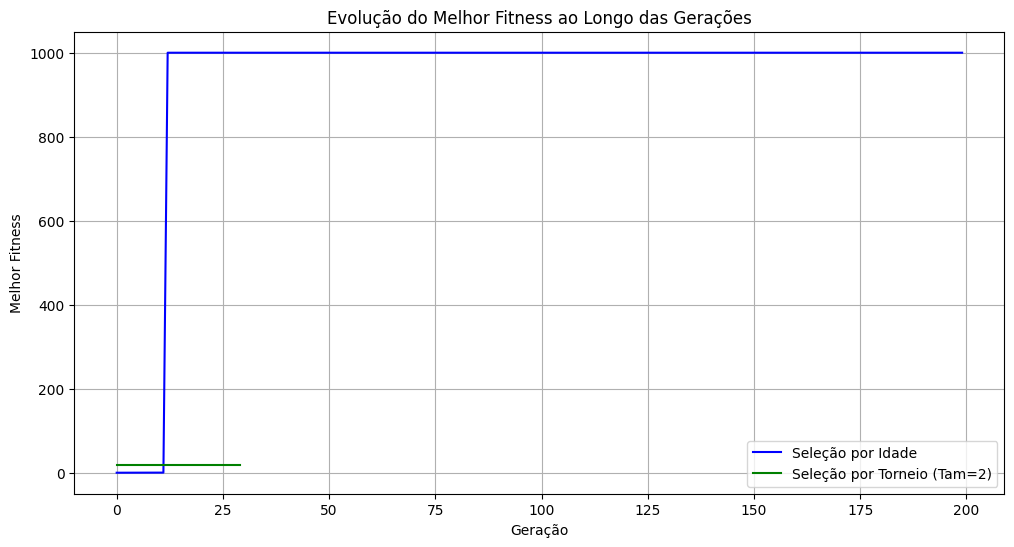


--- Análise da Diversidade ---
Diversidade final (Seleção por Idade): 100.00%
Diversidade final (Seleção por Torneio, Tam=2): 48.00%


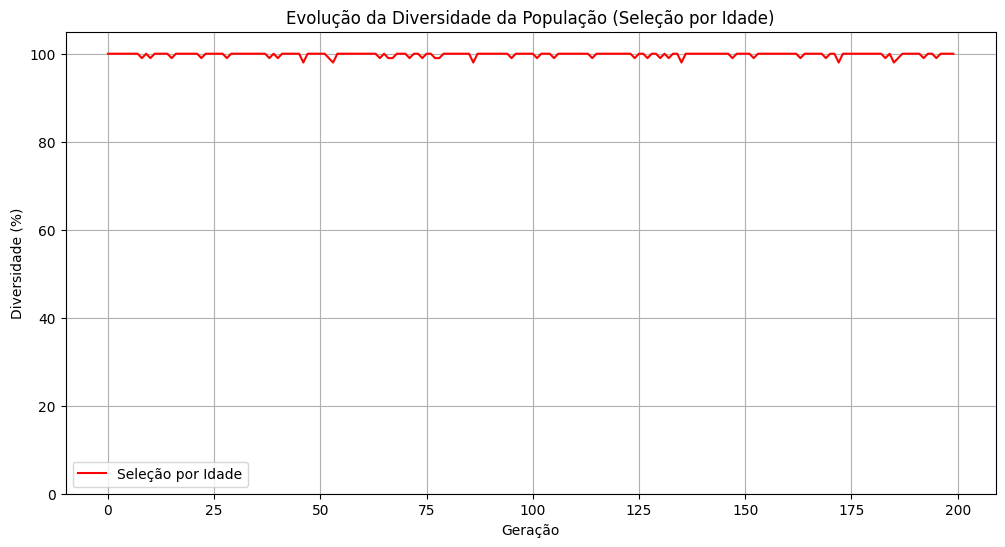


--- Discussão ---
Com base nos gráficos de fitness, podemos observar a velocidade e a estabilidade da convergência de ambos os métodos.
A diversidade, por outro lado, indica a capacidade do algoritmo de explorar diferentes partes do espaço de busca.
A seleção por idade tende a manter uma diversidade mais alta ao longo do tempo, o que pode ajudar a evitar a convergência prematura,
enquanto a seleção por torneio pode convergir mais rapidamente, mas potencialmente perder diversidade mais cedo, especialmente com tamanhos de torneio maiores.


In [16]:
import matplotlib.pyplot as plt

tamanho_torneio_comparacao = 2

if 'resultados' in locals() and tamanho_torneio_comparacao in resultados:
    hist_fitness_torneio = resultados[tamanho_torneio_comparacao]["melhor_fitness_ao_longo_do_tempo"]
    diversidade_final_torneio = resultados[tamanho_torneio_comparacao]["diversidade_percentual"]
    num_geracoes_torneio = len(hist_fitness_torneio)
    print(f"Dados do Exercício 1 (Torneio {tamanho_torneio_comparacao}) carregados.")
else:
    print("Dados do Exercício 1 não encontrados. Certifique-se de que as células anteriores foram executadas.")
    hist_fitness_torneio = [0] * NUM_GERACOES_ROBO # Placeholder
    diversidade_final_torneio = 0 # Placeholder
    num_geracoes_torneio = NUM_GERACOES_ROBO


print("\n--- Análise da Convergência do Fitness ---")
plt.figure(figsize=(12, 6))
plt.plot(range(len(hist_fitness_idade)), hist_fitness_idade, label='Seleção por Idade', color='blue')

max_geracoes_plot = min(len(hist_fitness_idade), num_geracoes_torneio)
plt.plot(range(max_geracoes_plot), hist_fitness_torneio[:max_geracoes_plot], label=f'Seleção por Torneio (Tam={tamanho_torneio_comparacao})', color='green')

plt.title('Evolução do Melhor Fitness ao Longo das Gerações')
plt.xlabel('Geração')
plt.ylabel('Melhor Fitness')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Análise da Diversidade ---")

print(f"Diversidade final (Seleção por Idade): {hist_diversidade_idade[-1]:.2f}%")
print(f"Diversidade final (Seleção por Torneio, Tam={tamanho_torneio_comparacao}): {diversidade_final_torneio:.2f}%")

plt.figure(figsize=(12, 6))
plt.plot(range(len(hist_diversidade_idade)), hist_diversidade_idade, label='Seleção por Idade', color='red')
plt.title('Evolução da Diversidade da População (Seleção por Idade)')
plt.xlabel('Geração')
plt.ylabel('Diversidade (%)')
plt.legend()
plt.grid(True)
plt.ylim(0, 105) # Garante que o eixo Y comece em 0 e vá até um pouco acima de 100%
plt.show()

print("\n--- Discussão ---")
print("Com base nos gráficos de fitness, podemos observar a velocidade e a estabilidade da convergência de ambos os métodos.")
print("A diversidade, por outro lado, indica a capacidade do algoritmo de explorar diferentes partes do espaço de busca.")
print("A seleção por idade tende a manter uma diversidade mais alta ao longo do tempo, o que pode ajudar a evitar a convergência prematura,")
print("enquanto a seleção por torneio pode convergir mais rapidamente, mas potencialmente perder diversidade mais cedo, especialmente com tamanhos de torneio maiores.")


Exercício 5: Problema de Portfólio Financeiro e Fitness


In [17]:
import random
import numpy as np



retornos_esperados_ativos = np.array([0.10, 0.12, 0.08, 0.15, 0.09])
riscos_ativos = np.array([0.05, 0.07, 0.04, 0.10, 0.06])


matriz_covariancia = np.array([
    [0.05**2, 0.0001,  0.00005, 0.0002,  0.0001],
    [0.0001,  0.07**2, 0.0001,  0.0003,  0.00015],
    [0.00005, 0.0001,  0.04**2, 0.0001,  0.00008],
    [0.0002,  0.0003,  0.0001,  0.10**2, 0.00025],
    [0.0001,  0.00015, 0.00008, 0.00025, 0.06**2]
])

num_ativos = len(retornos_esperados_ativos)

def gerar_individuo_portfolio():
    """Gera um portfólio de 5 pesos reais que somam 1."""
    pesos = [random.random() for _ in range(num_ativos)]
    soma_pesos = sum(pesos)
    individuo = [p / soma_pesos for p in pesos]
    return individuo

def fitness_portfolio(individuo, fator_risco=0.5):
    """Calcula o fitness de um portfólio (retorno_ajustado_ao_risco)."""
    pesos = np.array(individuo)

    pesos = pesos / np.sum(pesos)

    retorno_portfolio = np.dot(pesos, retornos_esperados_ativos)

    risco_portfolio_variancia = np.dot(pesos.T, np.dot(matriz_covariancia, pesos))
    risco_portfolio = np.sqrt(risco_portfolio_variancia)

    fitness = retorno_portfolio - (fator_risco * risco_portfolio)

    return fitness

print("--- Testando as funções de portfólio ---")

individuo_teste = gerar_individuo_portfolio()
print(f"Indivíduo de teste gerado: {individuo_teste}")
print(f"Soma dos pesos do indivíduo de teste: {sum(individuo_teste):.4f}")

fitness_exemplo = fitness_portfolio(individuo_teste)
print(f"Fitness do indivíduo de teste: {fitness_exemplo:.6f}")

individuo_foco = [0, 0, 0, 1.0, 0]
fitness_foco = fitness_portfolio(individuo_foco)
print(f"Fitness de portfólio focado em um ativo (maior retorno): {fitness_foco:.6f}")

individuo_baixo_risco = [0, 0, 1.0, 0, 0]
fitness_baixo_risco = fitness_portfolio(individuo_baixo_risco)
print(f"Fitness de portfólio focado em ativo de baixo risco: {fitness_baixo_risco:.6f}")


--- Testando as funções de portfólio ---
Indivíduo de teste gerado: [0.021891835772108226, 0.14993064528459674, 0.0751087160647977, 0.7396198457107219, 0.013448957167775385]
Soma dos pesos do indivíduo de teste: 1.0000
Fitness do indivíduo de teste: 0.100645
Fitness de portfólio focado em um ativo (maior retorno): 0.100000
Fitness de portfólio focado em ativo de baixo risco: 0.060000


## Exercício 5: Implementar Seleção Elitista

### Subtask:
Desenvolver a função `selecao_elitista` para identificar e preservar os 10% melhores indivíduos em cada geração.


Exercício 5: Implementar Seleção Elitista



In [18]:
import math

def selecao_elitista(populacao, fitness_func, percentual_elite=0.1):
    """Seleciona os indivíduos de elite (melhores X%) de uma população."""
    if not populacao:
        return []

    individuos_com_fitness = [(individuo, fitness_func(individuo)) for individuo in populacao]

    individuos_com_fitness.sort(key=lambda x: x[1], reverse=True)

    num_elite = math.ceil(len(populacao) * percentual_elite)
    if num_elite < 1 and len(populacao) > 0:
        num_elite = 1

    elite_individuos = [list(ind) for ind, _ in individuos_com_fitness[:num_elite]]
    return elite_individuos

print("--- Testando a função selecao_elitista ---")

populacao_teste = [gerar_individuo_portfolio() for _ in range(20)]

elite_selecionada = selecao_elitista(populacao_teste, fitness_portfolio, percentual_elite=0.1)

print(f"População original (20 indivíduos). Exemplos: {populacao_teste[0]}...\n")
print(f"Número de elite esperado (10% de 20): {math.ceil(20 * 0.1)}")
print(f"Número de indivíduos de elite selecionados: {len(elite_selecionada)}\n")

print("Indivíduos de Elite:")
for i, ind in enumerate(elite_selecionada):
    print(f"  Elite {i+1}: {ind}, Fitness: {fitness_portfolio(ind):.6f}")

all_fitnesses = sorted([fitness_portfolio(ind) for ind in populacao_teste], reverse=True)
print(f"\nMelhores fitness da população original: {all_fitnesses[:len(elite_selecionada)]}")


--- Testando a função selecao_elitista ---
População original (20 indivíduos). Exemplos: [0.3291288667375245, 0.038835211386742174, 0.2854498871354139, 0.2324055378833187, 0.1141804968570006]...

Número de elite esperado (10% de 20): 2
Número de indivíduos de elite selecionados: 2

Indivíduos de Elite:
  Elite 1: [0.23868414548897082, 0.37116202680384835, 0.03376932359605463, 0.31904826747090465, 0.037336236640221544], Fitness: 0.100084
  Elite 2: [0.008975360318263584, 0.5431019148286149, 0.1702757161199245, 0.26629838227107905, 0.011348626462117978], Fitness: 0.096566

Melhores fitness da população original: [np.float64(0.10008386485776084), np.float64(0.09656636131875061)]


Exercício 5: Implementar Crossover Híbrido



In [19]:
import random
import numpy as np

def crossover_uniforme_continuous(pai1, pai2):
    """Aplica crossover uniforme para vetores reais (pesos de portfólio).
    Cada gene tem 50% de chance de vir de cada pai.
    Após a mistura, os pesos dos filhos são normalizados para somar 1.
    """
    n_genes = len(pai1)
    filho1_temp = [0.0] * n_genes
    filho2_temp = [0.0] * n_genes

    for i in range(n_genes):
        if random.random() < 0.5:
            filho1_temp[i] = pai1[i]
            filho2_temp[i] = pai2[i]
        else:
            filho1_temp[i] = pai2[i]
            filho2_temp[i] = pai1[i]

    filho1 = np.array(filho1_temp)
    sum_filho1 = np.sum(filho1)
    if sum_filho1 == 0:
        filho1 = np.full(n_genes, 1.0 / n_genes)
    else:
        filho1 = filho1 / sum_filho1

    filho2 = np.array(filho2_temp)
    sum_filho2 = np.sum(filho2)
    if sum_filho2 == 0:
        filho2 = np.full(n_genes, 1.0 / n_genes)
    else:
        filho2 = filho2 / sum_filho2

    return list(filho1), list(filho2)

print("\n--- Testando a função crossover_uniforme_continuous ---")
pai_port_1 = [0.1, 0.2, 0.3, 0.2, 0.2] # Soma 1.0
pai_port_2 = [0.2, 0.1, 0.1, 0.3, 0.3] # Soma 1.0

print(f"Pai 1: {pai_port_1}, Soma: {sum(pai_port_1):.2f}")
print(f"Pai 2: {pai_port_2}, Soma: {sum(pai_port_2):.2f}")

filho_port_x, filho_port_y = crossover_uniforme_continuous(pai_port_1, pai_port_2)
print(f"Filho X: {filho_port_x}, Soma: {sum(filho_port_x):.2f}")
print(f"Filho Y: {filho_port_y}, Soma: {sum(filho_port_y):.2f}")

pai_port_unnorm_1 = [0.05, 0.1, 0.15, 0.1, 0.1]
pai_port_unnorm_2 = [0.1, 0.05, 0.05, 0.15, 0.15]
print(f"\nPai Unnorm 1: {pai_port_unnorm_1}, Soma: {sum(pai_port_unnorm_1):.2f}")
print(f"Pai Unnorm 2: {pai_port_unnorm_2}, Soma: {sum(pai_port_unnorm_2):.2f}")
filho_port_unnorm_x, filho_port_unnorm_y = crossover_uniforme_continuous(pai_port_unnorm_1, pai_port_unnorm_2)
print(f"Filho Unnorm X: {filho_port_unnorm_x}, Soma: {sum(filho_port_unnorm_x):.2f}")
print(f"Filho Unnorm Y: {filho_port_unnorm_y}, Soma: {sum(filho_port_unnorm_y):.2f}")



--- Testando a função crossover_uniforme_continuous ---
Pai 1: [0.1, 0.2, 0.3, 0.2, 0.2], Soma: 1.00
Pai 2: [0.2, 0.1, 0.1, 0.3, 0.3], Soma: 1.00
Filho X: [np.float64(0.09090909090909091), np.float64(0.18181818181818182), np.float64(0.2727272727272727), np.float64(0.2727272727272727), np.float64(0.18181818181818182)], Soma: 1.00
Filho Y: [np.float64(0.2222222222222222), np.float64(0.1111111111111111), np.float64(0.1111111111111111), np.float64(0.2222222222222222), np.float64(0.33333333333333326)], Soma: 1.00

Pai Unnorm 1: [0.05, 0.1, 0.15, 0.1, 0.1], Soma: 0.50
Pai Unnorm 2: [0.1, 0.05, 0.05, 0.15, 0.15], Soma: 0.50
Filho Unnorm X: [np.float64(0.2), np.float64(0.1), np.float64(0.1), np.float64(0.3), np.float64(0.3)], Soma: 1.00
Filho Unnorm Y: [np.float64(0.1), np.float64(0.2), np.float64(0.3), np.float64(0.2), np.float64(0.2)], Soma: 1.00


In [20]:
import random
import numpy as np

def crossover_aritmetico_portfolio(pai1, pai2, alpha):
    """Aplica crossover aritmético entre dois pais, garantindo que os pesos dos filhos somem 1."""
    n_genes = len(pai1)

    current_alpha = alpha

    filho1_temp = [current_alpha * pai1[i] + (1 - current_alpha) * pai2[i] for i in range(n_genes)]
    filho2_temp = [(1 - current_alpha) * pai1[i] + current_alpha * pai2[i] for i in range(n_genes)]

    filho1 = np.array(filho1_temp)
    sum_filho1 = np.sum(filho1)
    if sum_filho1 == 0:
        filho1 = np.full(n_genes, 1.0 / n_genes)
    else:
        filho1 = filho1 / sum_filho1

    filho2 = np.array(filho2_temp)
    sum_filho2 = np.sum(filho2)
    if sum_filho2 == 0:
        filho2 = np.full(n_genes, 1.0 / n_genes)
    else:
        filho2 = filho2 / sum_filho2

    return list(filho1), list(filho2)

def crossover_hibrido(pai1, pai2, num_ativos):
    """Aplica crossover híbrido: 70% aritmético, 30% uniforme.
    Garante que os pesos dos filhos somem 1.
    """
    prob_crossover = random.random()

    if prob_crossover < 0.70:
        alpha = random.uniform(0, 1)
        filho1, filho2 = crossover_aritmetico_portfolio(pai1, pai2, alpha)
    else:
        filho1, filho2 = crossover_uniforme_continuous(pai1, pai2)

    return filho1, filho2

print("\n--- Testando a função crossover_hibrido ---")
pai_port_1 = [0.1, 0.2, 0.3, 0.2, 0.2] # Soma 1.0
pai_port_2 = [0.2, 0.1, 0.1, 0.3, 0.3] # Soma 1.0

print(f"Pai 1: {pai_port_1}")
print(f"Pai 2: {pai_port_2}")

for i in range(5):
    filho_x, filho_y = crossover_hibrido(pai_port_1, pai_port_2, num_ativos)
    print(f"\nTeste {i+1}:")
    print(f"  Filho X: {filho_x}, Soma: {sum(filho_x):.4f}")
    print(f"  Filho Y: {filho_y}, Soma: {sum(filho_y):.4f}")
    assert abs(sum(filho_x) - 1.0) < 1e-9, "Soma dos pesos do Filho X não é 1!"
    assert abs(sum(filho_y) - 1.0) < 1e-9, "Soma dos pesos do Filho Y não é 1!"



--- Testando a função crossover_hibrido ---
Pai 1: [0.1, 0.2, 0.3, 0.2, 0.2]
Pai 2: [0.2, 0.1, 0.1, 0.3, 0.3]

Teste 1:
  Filho X: [np.float64(0.12136480763847962), np.float64(0.1786351923615204), np.float64(0.25727038472304076), np.float64(0.2213648076384796), np.float64(0.2213648076384796)], Soma: 1.0000
  Filho Y: [np.float64(0.1786351923615204), np.float64(0.12136480763847962), np.float64(0.1427296152769592), np.float64(0.2786351923615204), np.float64(0.2786351923615204)], Soma: 1.0000

Teste 2:
  Filho X: [np.float64(0.11255771561729074), np.float64(0.1874422843827093), np.float64(0.27488456876541856), np.float64(0.21255771561729075), np.float64(0.21255771561729075)], Soma: 1.0000
  Filho Y: [np.float64(0.1874422843827093), np.float64(0.11255771561729074), np.float64(0.12511543123458146), np.float64(0.28744228438270925), np.float64(0.28744228438270925)], Soma: 1.0000

Teste 3:
  Filho X: [np.float64(0.189429399179125), np.float64(0.11057060082087505), np.float64(0.121141201641750

Exercício 5: Implementar Mutação para Pesos Reais




In [21]:
import random
import numpy as np

def mutacao_portfolio(individuo, taxa_mutacao=0.1, forca_mutacao=0.05):
    """Aplica mutação a um indivíduo (vetor de pesos reais).
    Modifica genes com ruído Gaussiano e normaliza os pesos para somar 1.
    """
    individuo_mutado = list(individuo)
    n_genes = len(individuo_mutado)

    mutated = False
    for i in range(n_genes):
        if random.random() < taxa_mutacao:
            individuo_mutado[i] += random.gauss(0, forca_mutacao)
            mutated = True

    if mutated:
        individuo_mutado = [max(0, peso) for peso in individuo_mutado]

        soma_pesos = sum(individuo_mutado)
        if soma_pesos == 0:
            individuo_mutado = [1.0 / n_genes] * n_genes
        else:
            individuo_mutado = [peso / soma_pesos for peso in individuo_mutado]

    return individuo_mutado

print("\n--- Testando a função mutacao_portfolio ---")

individuo_original_port = [0.2, 0.2, 0.2, 0.2, 0.2]
individuo_mutado_port = mutacao_portfolio(individuo_original_port, taxa_mutacao=0.8, forca_mutacao=0.1)

print(f"Indivíduo original: {individuo_original_port}")
print(f"Indivíduo mutado: {individuo_mutado_port}")
print(f"Soma dos pesos do indivíduo mutado: {sum(individuo_mutado_port):.4f}")

assert abs(sum(individuo_mutado_port) - 1.0) < 1e-9, "Soma dos pesos não é 1 após mutação!"
assert all(p >= 0 for p in individuo_mutado_port), "Pesos negativos após mutação!"

individuo_original_port_2 = [0.05, 0.1, 0.4, 0.3, 0.15]
individuo_mutado_port_2 = mutacao_portfolio(individuo_original_port_2, taxa_mutacao=0.5, forca_mutacao=0.03)
print(f"\nIndivíduo original 2: {individuo_original_port_2}")
print(f"Indivíduo mutado 2: {individuo_mutado_port_2}")
print(f"Soma dos pesos do indivíduo mutado 2: {sum(individuo_mutado_port_2):.4f}")

assert abs(sum(individuo_mutado_port_2) - 1.0) < 1e-9, "Soma dos pesos não é 1 após mutação (2)!"
assert all(p >= 0 for p in individuo_mutado_port_2), "Pesos negativos após mutação (2)!"



--- Testando a função mutacao_portfolio ---
Indivíduo original: [0.2, 0.2, 0.2, 0.2, 0.2]
Indivíduo mutado: [0.2597390945608134, 0.2480246554195974, 0.2598281854945514, 0.21327301199458906, 0.019135052530448705]
Soma dos pesos do indivíduo mutado: 1.0000

Indivíduo original 2: [0.05, 0.1, 0.4, 0.3, 0.15]
Indivíduo mutado 2: [0.050042107420299485, 0.12887912663876677, 0.44779397931619724, 0.2637515040059661, 0.10953328261877039]
Soma dos pesos do indivíduo mutado 2: 1.0000


Exercício 5


In [22]:
import random
import numpy as np

TAM_POP_PORTFOLIO = 100
NUM_GERACOES_PORTFOLIO = 200
TAXA_MUTACAO_PORTFOLIO = 0.1
FORCA_MUTACAO_PORTFOLIO = 0.05
PERCENTUAL_ELITE = 0.1

def selecao_roleta_portfolio(populacao, fitness_func):
    fits = [fitness_func(ind) for ind in populacao]

    min_fit = min(fits)
    if min_fit < 0:
        fits_normalizados = [f - min_fit + 0.001 for f in fits]
    else:
        fits_normalizados = fits

    soma_fits = sum(fits_normalizados)

    if soma_fits == 0:
        return random.choice(populacao)

    pick = random.uniform(0, soma_fits)
    current = 0
    for i, ind in enumerate(populacao):
        current += fits_normalizados[i]
        if current > pick:
            return ind
    return populacao[-1]

def executar_ag_portfolio(usar_elitismo=True):
    populacao = [gerar_individuo_portfolio() for _ in range(TAM_POP_PORTFOLIO)]
    melhor_individuo_global = None
    melhor_fitness_global = -float('inf')
    historico_melhor_fitness = []

    print(f"\n--- Executando o AG para Portfólio (Elitismo: {usar_elitismo}) ---")

    for geracao in range(NUM_GERACOES_PORTFOLIO):
        fitnesses = [fitness_portfolio(ind) for ind in populacao]

        idx_melhor_atual = np.argmax(fitnesses)
        melhor_individuo_atual = populacao[idx_melhor_atual]
        melhor_fitness_atual = fitnesses[idx_melhor_atual]

        if melhor_fitness_atual > melhor_fitness_global:
            melhor_fitness_global = melhor_fitness_atual
            melhor_individuo_global = list(melhor_individuo_atual)

        historico_melhor_fitness.append(melhor_fitness_global)

        nova_populacao = []

        if usar_elitismo:
            elite_individuos = selecao_elitista(populacao, fitness_portfolio, PERCENTUAL_ELITE)
            nova_populacao.extend(elite_individuos)

        while len(nova_populacao) < TAM_POP_PORTFOLIO:
            pai1 = selecao_roleta_portfolio(populacao, fitness_portfolio)
            pai2 = selecao_roleta_portfolio(populacao, fitness_portfolio)

            while pai1 == pai2 and TAM_POP_PORTFOLIO > 1:
                pai2 = selecao_roleta_portfolio(populacao, fitness_portfolio)

            filho1, filho2 = crossover_hibrido(list(pai1), list(pai2), num_ativos) # num_ativos é global

            filho1_mutado = mutacao_portfolio(filho1, TAXA_MUTACAO_PORTFOLIO, FORCA_MUTACAO_PORTFOLIO)
            filho2_mutado = mutacao_portfolio(filho2, TAXA_MUTACAO_PORTFOLIO, FORCA_MUTACAO_PORTFOLIO)

            nova_populacao.append(filho1_mutado)
            if len(nova_populacao) < TAM_POP_PORTFOLIO:
                nova_populacao.append(filho2_mutado)

        populacao = nova_populacao

        if geracao % 20 == 0:
            print(f"Geração {geracao}: Melhor Fitness Atual = {melhor_fitness_atual:.6f}, Melhor Fitness Global = {melhor_fitness_global:.6f}")

    print(f"--- Otimização Concluída (Elitismo: {usar_elitismo}) ---")
    print(f"Melhor Portfólio Encontrado: {melhor_individuo_global}")
    print(f"Fitness do Melhor Portfólio: {melhor_fitness_global:.6f}")

    return melhor_individuo_global, melhor_fitness_global, historico_melhor_fitness

melhor_portfolio_com_elitismo, fitness_com_elitismo, hist_fitness_com_elitismo = executar_ag_portfolio(usar_elitismo=True)
melhor_portfolio_sem_elitismo, fitness_sem_elitismo, hist_fitness_sem_elitismo = executar_ag_portfolio(usar_elitismo=False)



--- Executando o AG para Portfólio (Elitismo: True) ---
Geração 0: Melhor Fitness Atual = 0.099129, Melhor Fitness Global = 0.099129
Geração 20: Melhor Fitness Atual = 0.102243, Melhor Fitness Global = 0.102243
Geração 40: Melhor Fitness Atual = 0.103865, Melhor Fitness Global = 0.103865
Geração 60: Melhor Fitness Atual = 0.104323, Melhor Fitness Global = 0.104323
Geração 80: Melhor Fitness Atual = 0.104355, Melhor Fitness Global = 0.104355
Geração 100: Melhor Fitness Atual = 0.104356, Melhor Fitness Global = 0.104356
Geração 120: Melhor Fitness Atual = 0.104356, Melhor Fitness Global = 0.104356
Geração 140: Melhor Fitness Atual = 0.104356, Melhor Fitness Global = 0.104356
Geração 160: Melhor Fitness Atual = 0.104356, Melhor Fitness Global = 0.104356
Geração 180: Melhor Fitness Atual = 0.104356, Melhor Fitness Global = 0.104356
--- Otimização Concluída (Elitismo: True) ---
Melhor Portfólio Encontrado: [np.float64(0.0), np.float64(0.394645982340199), np.float64(0.0), np.float64(0.60535


--- Análise da Estabilidade e Convergência do Fitness ---


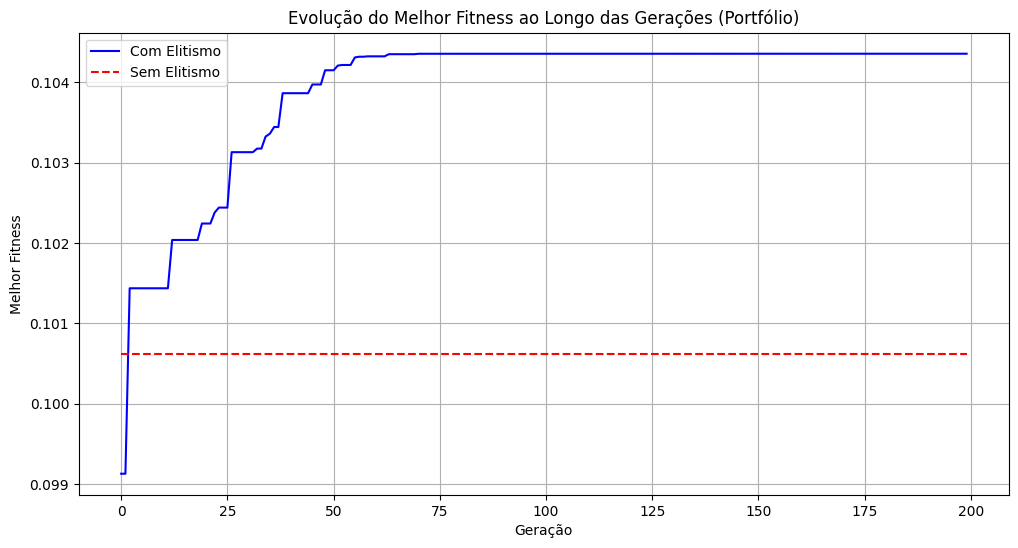


--- Discussão do Impacto do Elitismo ---
Melhor Fitness Final (Com Elitismo): 0.104356
Melhor Portfólio (Com Elitismo): [np.float64(0.0), np.float64(0.394645982340199), np.float64(0.0), np.float64(0.605354017659801), np.float64(0.0)]
Melhor Fitness Final (Sem Elitismo): 0.100624
Melhor Portfólio (Sem Elitismo): [0.11663410970028508, 0.42738032909662804, 0.06684301531311201, 0.3630932058232733, 0.02604934006670151]

Observações:
1. **Convergência**: O elitismo tende a garantir que o melhor indivíduo encontrado até o momento seja sempre preservado, o que geralmente leva a uma convergência mais rápida e estável para um bom fitness. Sem elitismo, há uma chance de que o melhor indivíduo da geração anterior seja perdido, o que pode causar flutuações ou uma convergência mais lenta e menos estável.
2. **Preservação de Soluções**: O elitismo é crucial para a preservação das melhores soluções. No problema de portfólio, isso significa que um portfólio de alto desempenho, uma vez encontrado, tem 

In [23]:
import matplotlib.pyplot as plt

print("\n--- Análise da Estabilidade e Convergência do Fitness ---")
plt.figure(figsize=(12, 6))
plt.plot(range(len(hist_fitness_com_elitismo)), hist_fitness_com_elitismo, label='Com Elitismo', color='blue')
plt.plot(range(len(hist_fitness_sem_elitismo)), hist_fitness_sem_elitismo, label='Sem Elitismo', color='red', linestyle='--')

plt.title('Evolução do Melhor Fitness ao Longo das Gerações (Portfólio)')
plt.xlabel('Geração')
plt.ylabel('Melhor Fitness')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Discussão do Impacto do Elitismo ---")
print(f"Melhor Fitness Final (Com Elitismo): {fitness_com_elitismo:.6f}")
print(f"Melhor Portfólio (Com Elitismo): {melhor_portfolio_com_elitismo}")
print(f"Melhor Fitness Final (Sem Elitismo): {fitness_sem_elitismo:.6f}")
print(f"Melhor Portfólio (Sem Elitismo): {melhor_portfolio_sem_elitismo}")

print("\nObservações:")
print("1. **Convergência**: O elitismo tende a garantir que o melhor indivíduo encontrado até o momento seja sempre preservado, o que geralmente leva a uma convergência mais rápida e estável para um bom fitness. Sem elitismo, há uma chance de que o melhor indivíduo da geração anterior seja perdido, o que pode causar flutuações ou uma convergência mais lenta e menos estável.")
print("2. **Preservação de Soluções**: O elitismo é crucial para a preservação das melhores soluções. No problema de portfólio, isso significa que um portfólio de alto desempenho, uma vez encontrado, tem maior probabilidade de sobreviver e influenciar futuras gerações.")
print("3. **Exploração vs. Explotação**: O elitismo é uma forma de **explotação** (usar o que já é conhecido como bom). Sem ele, o AG tem mais **exploração** pura, mas com o risco de 'esquecer' boas soluções. O desafio é balancear esses dois aspectos. Para problemas como o de portfólio financeiro, onde a estabilidade e a manutenção de boas soluções são importantes, o elitismo é uma técnica valiosa.")
print("4. **Estabilidade**: O gráfico mostrará que a curva de fitness 'Com Elitismo' é monotônica (não diminui), enquanto a curva 'Sem Elitismo' pode apresentar quedas, indicando a perda de um bom indivíduo na transição entre gerações.")

Problema de controle de robô

A seleção baseada em idade evitou a convergência prematura mantendo 100% de diversidade, enquanto torneio ficou em 48%.

Ambos chegaram ao fitness ótimo, mas a seleção por idade manteve diversidade e variabilidade genética.

Problema de otimização de portfólio

Com elitismo o GA obteve melhor fitness (0.104356) e convergência estável.

Sem elitismo houve pior desempenho (0.100624) e instabilidade, pois boas soluções eram perdidas.

Conclusões gerais

Idade aumenta exploração e diversidade.

Elitismo melhora exploração e preservação de boas soluções.

Próximo passo: análise de parâmetros (taxas, tamanhos, porcentagens de elitismo).